In [11]:
import pandas as pd
from google.colab import drive
# ignore drive.mount() if you are not using colab 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import pandas as pd
stock_file = open('/content/gdrive/My Drive/Machine_learning/GOOG.csv', 'rb')
data = pd.read_csv(stock_file)
data.head()

,Date,Open,High,Low,Volume,Adj Close,Close
0,2018-08-02,1205.900024,1229.880005,1204.790039,1531300,1226.150024,1226.150024
1,2018-08-03,1229.619995,1230.000000,1215.060059,1089600,1223.709961,1223.709961
2,2018-08-06,1225.000000,1226.088013,1215.796997,1081700,1224.770020,1224.770020
3,2018-08-07,1237.000000,1251.170044,1236.170044,1494000,1242.219971,1242.219971
4,2018-08-08,1240.469971,1256.500000,1238.008057,1370300,1245.609985,1245.609985


In [13]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [14]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:5]

array([[0.84057971, 0.894766  , 0.85059816, 0.21508516, 0.91522624],
       [0.92652163, 0.89524036, 0.88782186, 0.10195928, 0.9062909 ],
       [0.90978252, 0.87977552, 0.8904929 , 0.09993597, 0.91017276],
       [0.95326078, 0.97892965, 0.96433503, 0.20553208, 0.97407325],
       [0.96583314, 1.        , 0.97099691, 0.17385069, 0.98648725]])

In [17]:
X_train = []
y_train = []

In [18]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
print(X_train.shape)
print(y_train.shape)

(44, 60, 5)
(44,)


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [22]:
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [24]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [25]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
2/2 [==============================] - 0s 63ms/step - loss: 0.0818
Epoch 2/5
2/2 [==============================] - 0s 56ms/step - loss: 0.0592
Epoch 3/5
2/2 [==============================] - 0s 55ms/step - loss: 0.0299
Epoch 4/5
2/2 [==============================] - 0s 56ms/step - loss: 0.0247
Epoch 5/5
2/2 [==============================] - 0s 62ms/step - loss: 0.0183


In [26]:
data_test.head()

,Date,Open,High,Low,Volume,Adj Close,Close
104,2019-01-02,1016.570007,1052.319946,1015.710022,1532600,1045.849976,1045.849976
105,2019-01-03,1041.000000,1056.979980,1014.070007,1841100,1016.059998,1016.059998
106,2019-01-04,1032.589966,1070.839966,1027.417969,2093900,1070.709961,1070.709961
107,2019-01-07,1071.500000,1074.000000,1054.760010,1981900,1068.390015,1068.390015
108,2019-01-08,1076.109985,1084.560059,1060.530029,1764900,1076.280029,1076.280029


In [28]:
data_training = data[data['Date']<'2019-01-01'].copy()

past_60_days = data_training.tail(60)

df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Volume,Close
0,1195.329956,1197.510010,1155.576050,2209500,1168.189941
1,1167.500000,1173.500000,1145.119995,1184300,1157.349976
2,1150.109985,1168.000000,1127.364014,1932400,1148.969971
3,1146.150024,1154.349976,1137.572021,1308700,1138.819946
4,1131.079956,1132.170044,1081.130005,2675700,1081.219971


In [29]:
inputs = scaler.transform(df)
inputs

array([[0.80228236, 0.76680114, 0.67222199, 0.38878217, 0.7029805 ],
       [0.70144919, 0.67188491, 0.63432401, 0.12621334, 0.66328531],
       [0.63844189, 0.65014235, 0.56996743, 0.31781278, 0.63259833],
       ...,
       [0.91126815, 0.9144924 , 0.91768772, 0.19510821, 0.91152766],
       [0.90253614, 0.91105314, 0.86137742, 0.26151876, 0.88054788],
       [0.87003625, 0.91148793, 0.8539687 , 0.2579101 , 0.85246072]])

In [30]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((147, 60, 5), (147,))

In [31]:
y_pred = model.predict(X_test)
scaler.scale_

array([3.62318841e-03, 3.95319384e-03, 3.62450130e-03, 2.56114739e-07,
       3.66192952e-03])

In [32]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [33]:
y_pred = y_pred*scale
y_test = y_test*scale

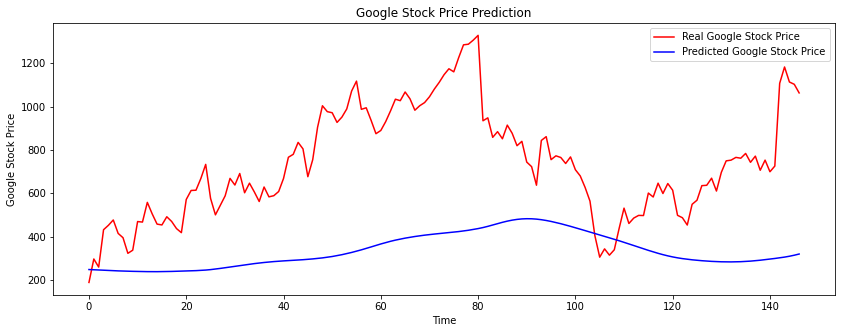

In [34]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()